<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-overview" data-toc-modified-id="Project-overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project overview</a></span></li><li><span><a href="#Reading-data-scrapped-in-previous-notebook" data-toc-modified-id="Reading-data-scrapped-in-previous-notebook-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading data scrapped in previous notebook</a></span><ul class="toc-item"><li><span><a href="#Removing-odd-cases-of-properties-outside-of-Warsaw" data-toc-modified-id="Removing-odd-cases-of-properties-outside-of-Warsaw-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Removing odd cases of properties outside of Warsaw</a></span></li></ul></li><li><span><a href="#Basic-data-visualization" data-toc-modified-id="Basic-data-visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basic data visualization</a></span><ul class="toc-item"><li><span><a href="#Visualizing-unit-price-(PLN/m2)-for-each-offer-as-scatter-plot" data-toc-modified-id="Visualizing-unit-price-(PLN/m2)-for-each-offer-as-scatter-plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualizing unit price (PLN/m2) for each offer as scatter plot</a></span></li><li><span><a href="#Grouping-offers-to-create-a-grid" data-toc-modified-id="Grouping-offers-to-create-a-grid-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Grouping offers to create a grid</a></span></li></ul></li><li><span><a href="#Choroplet-maps" data-toc-modified-id="Choroplet-maps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Choroplet maps</a></span><ul class="toc-item"><li><span><a href="#Initial-approach-to-grid-based-choropleth-map" data-toc-modified-id="Initial-approach-to-grid-based-choropleth-map-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Initial approach to grid based choropleth map</a></span></li><li><span><a href="#Countour-plot-with-geojson" data-toc-modified-id="Countour-plot-with-geojson-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Countour plot with geojson</a></span></li><li><span><a href="#Could-we-make-contour-plot-look-better-with-interpolation-of-point?" data-toc-modified-id="Could-we-make-contour-plot-look-better-with-interpolation-of-point?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Could we make contour plot look better with interpolation of point?</a></span><ul class="toc-item"><li><span><a href="#Does-underground-proximity-seem-to-be-visible-on-the-price-map?" data-toc-modified-id="Does-underground-proximity-seem-to-be-visible-on-the-price-map?-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Does underground proximity seem to be visible on the price map?</a></span></li></ul></li></ul></li><li><span><a href="#Scraping-geo-data-using-Google-Api" data-toc-modified-id="Scraping-geo-data-using-Google-Api-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scraping geo data using Google Api</a></span><ul class="toc-item"><li><span><a href="#How-long-would-it-take-to-commute-from-each-tile-to-central-point-of-Warsaw" data-toc-modified-id="How-long-would-it-take-to-commute-from-each-tile-to-central-point-of-Warsaw-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>How long would it take to commute from each tile to central point of Warsaw</a></span></li><li><span><a href="#Mapping-commute-time" data-toc-modified-id="Mapping-commute-time-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Mapping commute time</a></span></li><li><span><a href="#Looking-for-best-balance-between-price-and-commute-time" data-toc-modified-id="Looking-for-best-balance-between-price-and-commute-time-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Looking for best balance between price and commute time</a></span></li></ul></li><li><span><a href="#Preparing-data-for-models-in-Part-3" data-toc-modified-id="Preparing-data-for-models-in-Part-3-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Preparing data for models in Part 3</a></span></li></ul></div>

In [391]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
import os
from urllib.request import urlretrieve
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import json
import numpy as np
import timeit 
from datetime import datetime

In [2]:
import plotly.express as px
from shapely.geometry import Polygon, MultiPolygon
import geopandas as gpd

In [3]:
# Cufflinks wrapper on plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme

import plotly.figure_factory as ff

import plotly.graph_objects as go

In [4]:
#Selecting a central city point to center all graphs around - Swietokrzyska Subway 
center_coors=52.235176, 21.008393

# Project overview

In the second part of Warsaw Real Estate prices project we will focus on visualization using geofeatures. We will also enrich pricing data with commute times extracted from google maps. The data analyzed in this notebook will be used to create algorithm allowing to benchmark property prices in part 3 of this project.

The biggest challenge faced in this part of the exercise, was the difficulty of customizing map vizualizations. Scatter plots on a map or choroleth map based on administrative boundaries, which often do not have much in common with actual price clustering areas.

I aimed to create countour heatmaps, which would allow us to easily locate the custom price and commute time areas based on our data. After some investigation I found that combining interpolation between points with filled countour plot, which was later converted to custom geojson, allowed to created beautiful and easy to read maps, which allow us to look at Warsaw Real Estate Prices in a completely new view.

# Reading data scrapped in previous notebook

In [5]:
df=pd.read_excel("Warsaw_RE_data.xlsx")

In [6]:
df.columns

Index(['Unnamed: 0', 'Id', 'Area', 'Price', 'latitude', 'longitude',
       'build_year', 'building_floors_num', 'rooms_num', 'floors_num', 'City',
       'district', 'market', 'Building_material', 'Building_ownership',
       'Building_type', 'Construction_status', 'floor_no', 'Heating',
       'Windows_type', 'Equipment_types_dishwasher', 'Equipment_types_fridge',
       'Equipment_types_furniture', 'Equipment_types_oven',
       'Equipment_types_stove', 'Equipment_types_tv',
       'Equipment_types_washing_machine', 'Extras_types_air_conditioning',
       'Extras_types_attic', 'Extras_types_balcony', 'Extras_types_basement',
       'Extras_types_garage', 'Extras_types_garden', 'Extras_types_lift',
       'Extras_types_separate_kitchen', 'Extras_types_terrace',
       'Extras_types_two_storey', 'Extras_types_usable_room',
       'Media_types_cable-television', 'Media_types_electricity',
       'Media_types_internet', 'Media_types_phone', 'Media_types_sewage',
       'Media_types_wate

In [10]:
df.shape

(11884, 50)

## Removing odd cases of properties outside of Warsaw

In [7]:
df=df.query("City=='warszawa'")
df=df.query("latitude>52 and latitude<53")
df=df.query("longitude>20 and longitude<21.2")

In [8]:
df.shape

(11884, 50)

In [9]:
df.groupby("district", as_index=False).count()[["district","Id"]].sort_values(by="Id",ascending=False).head(10)

district    Id
115            Wola  1312
44          Mokotów  1185
126     Śródmieście   903
4         Białołęka   851
70   Praga-Południe   662
3            Bemowo   587
106           Ursus   498
107         Ursynów   425
112         Wilanów   425
120          Włochy   410


The key variable visualized in this part, which will become our y in part 3 is the unit_price of PLN/m2, which allows us to compare properties of different sizes.

In [11]:
df["unit_price"]=df.Price/df.Area
df["unit_price"]=df.unit_price.apply(lambda x:int(x))

# Basic data visualization

## Visualizing unit price (PLN/m2) for each offer as scatter plot

In [294]:
data=[]
trace0=go.Scattermapbox(
            lat=df.latitude,
            lon=df.longitude,
          
            mode='markers',
            marker=dict(
                opacity=0.5, 
                size=10, 
                color=df.unit_price,
               
                colorscale="jet",
                cauto=False,
                cmax=20000,
                showscale=True),
                text=df.unit_price,
            
           
            )



data=[trace0]

layout = go.Layout(
    title="Offer unit price [PLN/m2]",  
    title_x=0.4,
   
    
    
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 80, b = 0, l = 0, r = 0),
    font = dict(color = 'dark grey', size = 18),
 
    mapbox = dict(
       

        center = dict(
            lat = center_coors[0],
            lon = center_coors[1]
        ),
        # default level of zoom
        zoom = 10,
        # default map style
        style = "carto-positron"
    )

)

figure=go.Figure(
    data=data,
    layout=layout,
  
    )



iplot(figure)


Classic scattermapbox with over 10k points might look effective at first glance, but it is actually quite hard to read and nearly impossible to gain any more insights than - prices are high in the city centre.

## Grouping offers to create a grid

Rounding Lat and Lon allows us to create a grid with step size equivalent to chosen rounding num. A coefficient dividing rounding num by 2 for latitude is recommended for geography of Europe, as it makes the grid tiles similar to squares. Without this correction, the grid consists of rectangles with longitude side nearly 2 times longer

In [325]:
rounding_num=0.015 #roundign coordinates by chosen precision creates a grid
df["lon_mod"]=np.round(df.longitude/rounding_num,0)*rounding_num
correction_coeff=0.5

df["lat_mod"]=np.round(df.latitude/(rounding_num*correction_coeff),0)*(rounding_num*correction_coeff)


In [326]:
df["lon_mod"]=np.round(df["lon_mod"],4)
df["lat_mod"]=np.round(df["lat_mod"],4)

In [338]:
# Creating grid dataframe with average unit prices for each tile. Excluding tiles with sample below 3 as insufficient samples. 
df_map=df[["lat_mod","lon_mod","unit_price"]].groupby(["lat_mod","lon_mod"], as_index=False).mean()
df_map["sample_size"]=df[["lat_mod","lon_mod","Id"]].groupby(["lat_mod","lon_mod"], as_index=False).count().Id
df_map["district"]=df[["lat_mod","lon_mod","district"]].groupby(["lat_mod","lon_mod"], as_index=False).first().district
df_map["district"]=np.where(df_map.district.isna(),"Other",df_map.district)
df_map=df_map.query("sample_size>3")
df_map.reset_index(inplace=True)
df_map["geo_Id"]=df_map.index

In [339]:
df_map.head()

index  lat_mod  lon_mod    unit_price  sample_size                district  \
0      3  52.1025   20.985   5846.500000            4                    Pyry   
1      7  52.1175   21.000   6913.800000            5  Śródmieście Południowe   
2      8  52.1175   21.015   6966.833333            6                    Pyry   
3     12  52.1250   21.060  10167.571429            7                  Kabaty   
4     14  52.1325   21.015   8470.200000            5                    Pyry   

   geo_Id  
0       0  
1       1  
2       2  
3       3  
4       4

In [344]:
data=[]
trace0=dict(
            lat=df_map.lat_mod,
            lon=df_map.lon_mod,
          
            type="scattermapbox",
            mode='markers',
            marker=dict(

                size=18, 
                color=df_map.unit_price,
                opacity=0.6,
                colorscale="jet",
                cauto=False,
                cmax=20000,
                showscale=True),
                text=df_map.unit_price,
            
           
            )



data=[trace0]

layout = go.Layout(
    title="Grid average unit price [PLN/m2] - scatter plot",  
    title_x=0.4,
   
    
    
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 80, b = 0, l = 0, r = 0),
    font = dict(color = 'dark grey', size = 18),
 
    mapbox = dict(
       

        center = dict(
            lat = center_coors[0],
            lon = center_coors[1]
        ),
        # default level of zoom
        zoom = 10,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=data,
    layout=layout
    )
iplot(figure)

# Choroplet maps

Scatter plots work well with maps, but they tend to be too crowded, on the other hand, the other surface plots are easier to read, but cannot be combined with a map using plotly. A choropleth map with custom created geojson object will probably be the best solution. 

## Initial approach to grid based choropleth map


To start working with choropleth maps, let's try to create our custom geojson, which will form a grid.

In [341]:
geo_list=[]

for i in range(0,df_map.shape[0]):
    point=df_map.iloc[i,:]
    geo_json={}
    geo_json["type"]="Feature"
    
    geo_json["properties"]={"District":point.district}
    
    geo_json["geometry"]={
        "type":"Polygon",
        "coordinates":[[[point.lon_mod+rounding_num/2,point.lat_mod+rounding_num*correction_coeff/2],
                        [point.lon_mod-rounding_num/2,point.lat_mod+rounding_num*correction_coeff/2],
                        [point.lon_mod-rounding_num/2,point.lat_mod-rounding_num*correction_coeff/2],
                        [point.lon_mod+rounding_num/2,point.lat_mod-rounding_num*correction_coeff/2]]]}
        
    geo_json["id"]=i
    
    geo_list.append(geo_json)


In [342]:
grid_geojson={"type":"FeatureCollection","features":geo_list}

In [345]:

trace = go.Choroplethmapbox(
                            geojson=grid_geojson,
                            locations=df_map.geo_Id,
                            z=df_map.unit_price,
                            colorscale="jet", 
                            text=df_map.sample_size,

 
                            marker_line_width=0,

                            marker=dict(opacity=0.5),

                           )
layout = go.Layout(
    title="Grid average unit price [PLN/m2] - choropleth grid",  
    title_x=0.4,
   
    
    
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 80, b = 0, l = 0, r = 0),
    font = dict(color = 'dark grey', size = 18),
 
    mapbox = dict(
       

        center = dict(
            lat = center_coors[0],
            lon = center_coors[1]
        ),
        # default level of zoom
        zoom = 10,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=[trace],
    layout=layout,
  
    )

iplot(figure)

Choropleth map based on grid looks much neater and is easy to read, but the continuous scale makes clustering more difficult. The data points also leave some blank spaces. Creating a heatmap with interpolation, could be an answer to this issue, allowing us to cover the whole area of Warsaw.

## Countour plot with geojson

Custom geojsons can be created to represent contour plots. Creating a countour plot will make it easier to distinct boundaries between price areas within Warsaw.

In [400]:
import matplotlib.pyplot as plt


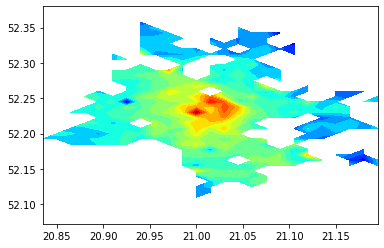

In [401]:
df_piv=pd.pivot_table(df, values="unit_price", index=df.lat_mod, columns=df.lon_mod, aggfunc=np.mean)
z=df_piv.values
y=df_piv.index
x=df_piv.columns
cs=plt.contourf(x,y,z,20,cmap="jet")

Basic contour plot looks ok, but it is missing a lot of areas due to missing data, parks or Vistula River. 

## Could we make contour plot look better with interpolation of point?

Using around around 300 grid points with price averages we can interplote them into a 100 by 100 grid to represent price heatmap for whole area of Warsaw

In [347]:
df_map.shape

(311, 7)

In [348]:
z=df_map.unit_price
y=df_map.lat_mod
x=df_map.lon_mod

In [349]:
from scipy.interpolate import griddata
from numpy import linspace

In [350]:
xi = linspace(x.min(),x.max(),100);
yi = linspace(y.min(),y.max(),100);
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')

In [351]:
 np.nanmax(zi)

20618.45439420861

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

The following kwargs were not used by contour: 'visible'



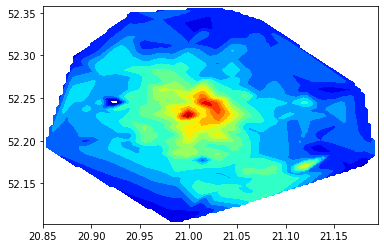

In [425]:
cs = plt.contourf(xi,yi,zi,range(5000,int( np.nanmax(zi))+1000,1000),cmap=plt.cm.jet)


In [355]:
import geojsoncontour

In [356]:
geojson = geojsoncontour.contourf_to_geojson(
    contourf=cs,
    ndigits=3,
   
)

price_geojson=eval(geojson)

In [357]:
arr_temp=np.ones([len(price_geojson["features"]),2])

In [358]:
for i in range(0, len(price_geojson["features"])):
    price_geojson["features"][i]["id"]=i

    
    arr_temp[i,0]=i
    arr_temp[i,1]=float(price_geojson["features"][i]["properties"]["title"])
    


In [359]:
df_contour=pd.DataFrame(arr_temp, columns=["Id","Price"])

In [363]:
trace = go.Choroplethmapbox(
                            geojson=price_geojson,
                            locations=df_contour.Id,
                            z=df_contour.Price,
                            colorscale="jet",  
                            marker_line_width=0,

                            marker=dict(opacity=0.5)
                           )




layout = go.Layout(
    title="Warsaw Real Estate prices heatmap [PLN/m2]",  
    title_x=0.4,
   
    
    
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 80, b = 0, l = 0, r = 0),
    font = dict(color = 'dark grey', size = 18),
 
    mapbox = dict(
       

        center = dict(
            lat = center_coors[0],
            lon = center_coors[1]
        ),
        # default level of zoom
        zoom = 11,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=[trace],
    layout=layout,
  
    )

iplot(figure)

Now we can clearly see most expensive areas and the gradient of price decrease in all of Warsaw. This type of graph allows us to see the most expensive areas near city center and Eastern riverbank in contrast to much cheaper prices on the West riverbank.Contour plotted against map of Warsaw is much easier to read than the scatter plot withour loosing too much detail. 

### Does underground proximity seem to be visible on the price map?

In [173]:
df_ug=pd.read_excel("underground_data.xlsx")
df_ug_A=df_ug.query("Line=='A'")
df_ug_C=df_ug.query("Line=='C'")

In [174]:

trace1=go.Scattermapbox(
            lat=df_ug_A.Lat,
            lon=df_ug_A.Lon,
            name="Underground Line A",
            text=df_ug_A.Name,
            mode='lines+markers',
            showlegend=False,
            opacity=0.5,
            marker=dict(
                opacity=0.8, 
                size=8, 
                color="grey",
               
               
            
           
            ))


trace2=go.Scattermapbox(
            lat=df_ug_C.Lat,
            lon=df_ug_C.Lon,
            name="Underground Line C",
            text=df_ug_C.Name,
            showlegend=False,
            mode='lines+markers',
            opacity=0.5,
            marker=dict(
                opacity=0.8, 
                size=8, 
                color="grey",
               
               
            
           
            ))
    
undergroung_trace=[trace1,trace2]

In [367]:
trace = go.Choroplethmapbox(
                            geojson=price_geojson,
                            name="Unit price",
                            locations=df_contour.Id,
                            z=df_contour.Price,
                            colorscale="jet",  
                            marker_line_width=0,

                            marker=dict(opacity=0.5)
                           )



layout = go.Layout(
    title="Warsaw RE prices heatmap with Underground stations  [PLN/m2]",  

   
    
    
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 80, b = 0, l = 0, r = 0),
    font = dict(color = 'dark grey', size = 18),
 
    mapbox = dict(
       

        center = dict(
            lat = center_coors[0],
            lon = center_coors[1]
        ),
        # default level of zoom
        zoom = 11,
        # default map style
        style = "carto-positron"
    )

)


figure=dict(
    data=[trace]+undergroung_trace,
    layout=layout,
  
    )

iplot(figure)

After adding Underground lines to the price heatmap, we can see that the slower decrease of prices in relation to distance to center seen in Zoliborz, Wola, Targowek and Upper Mokotow can be be related to underground proximity. 

# Scraping geo data using Google Api

One of key variables affecting real estate prices is the time it takes to get to city central point. This data for using public transport and car can be extracted from googlemaps. 

I have chosen Swietokrzyska Underground station as the Central point as it is the junction between 2 underground lines and is also in the center of gravity of Warsaw Real Estate Prices. 


In [167]:
api_key = open("Api_key.txt", "r").read()

In [54]:
import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key=api_key)


## How long would it take to commute from each tile to central point of Warsaw

In [59]:
# Metro Swietokrzyska coordinates
end_coors=52.235176, 21.008393

In [60]:
def get_time_to_point(start_coors, end_coors, time, journey_mode):
    directions_result = gmaps.directions(start_coors,
                                     end_coors,
                                     mode=journey_mode,
                                     departure_time=time)
    try:
        distance=directions_result[0]["legs"][0]["distance"]["value"]/1000
        time=directions_result[0]["legs"][0]["duration"]["value"]/60
    except:
        distance=np.NaN
        time=np.NaN
    return(time, distance)

In [61]:
def append_google_directions(df, endpoint, start_time, journey_mode, name):
    #Journey mode in ["driving", "walking", "bicycling", "transit"]
    time_list=[]
    dist_list=[]
    for i in range(0,df.shape[0]):
        start_coors=df.lat_mod[i],df.lon_mod[i]
        time, distance = get_time_to_point(start_coors, end_coors, start_time, journey_mode)
        time_list.append(time)
        dist_list.append(distance)
    dist_name="distance_"+name
    time_name="time_"+name
    df[dist_name]=np.asarray(dist_list)
    df[time_name]=np.asarray(time_list)
    return(df)

In [62]:
end_coors=52.235176, 21.008393


In [63]:
df_map.head()

lat_mod  lon_mod  unit_price  sample district
0  52.0725   21.015      5842.0       1  Ursynów
1  52.0800   20.955     11484.0       2  Jelonki
2  52.0950   21.045      4887.0       1      NaN
3  52.1025   20.985      5846.5       4     Pyry
4  52.1025   21.030      6912.0       3  Ursynów

In [64]:
start_time=datetime(2020,6,1,8,0)
df_googlemaps=append_google_directions(df_map,end_coors,start_time,"transit","transit_8AM")
df_googlemaps=append_google_directions(df_googlemaps,end_coors,start_time,"driving","driving_8AM")


In [65]:
df_map.head()

lat_mod  lon_mod  unit_price  sample district  distance_transit_8AM  \
0  52.0725   21.015      5842.0       1  Ursynów                25.102   
1  52.0800   20.955     11484.0       2  Jelonki                25.634   
2  52.0950   21.045      4887.0       1      NaN                20.727   
3  52.1025   20.985      5846.5       4     Pyry                19.685   
4  52.1025   21.030      6912.0       3  Ursynów                17.087   

   time_transit_8AM  distance_driving_8AM  time_driving_8AM  
0         59.700000                19.640         35.833333  
1         72.583333                25.954         31.800000  
2         63.233333                18.750         34.700000  
3         67.633333                18.121         32.050000  
4         57.300000                16.519         30.816667

In [66]:
def append_google_directions_return(df, start_point, start_time, journey_mode, name):
    #Journey mode in ["driving", "walking", "bicycling", "transit"]
    time_list=[]
    dist_list=[]
    for i in range(0,df.shape[0]):
        end_coors=df.lat_mod[i],df.lon_mod[i]
        time, distance = get_time_to_point(start_point, end_coors, start_time, journey_mode)
        time_list.append(time)
        dist_list.append(distance)
    dist_name="distance_"+name
    time_name="time_"+name
    df[dist_name]=np.asarray(dist_list)
    df[time_name]=np.asarray(time_list)
    return(df)

In [69]:
start_time=datetime(2020,6,5,17,0)
start_coors=52.235176, 21.008393
df_googlemaps=append_google_directions_return(df_googlemaps,start_coors,start_time,"transit","return_transit_5PM")

In [70]:
df_googlemaps=append_google_directions_return(df_googlemaps,start_coors,start_time,"driving","return_driving_5PM")

In [71]:
df_googlemaps.head()

lat_mod  lon_mod  unit_price  sample district  distance_transit_8AM  \
0  52.0725   21.015      5842.0       1  Ursynów                25.102   
1  52.0800   20.955     11484.0       2  Jelonki                25.634   
2  52.0950   21.045      4887.0       1      NaN                20.727   
3  52.1025   20.985      5846.5       4     Pyry                19.685   
4  52.1025   21.030      6912.0       3  Ursynów                17.087   

   time_transit_8AM  distance_driving_8AM  time_driving_8AM  \
0         59.700000                19.640         35.833333   
1         72.583333                25.954         31.800000   
2         63.233333                18.750         34.700000   
3         67.633333                18.121         32.050000   
4         57.300000                16.519         30.816667   

   distance_return_transit_5PM  time_return_transit_5PM  \
0                       25.328                49.533333   
1                       33.013                84.016667   
2                       20.858                66.733333   
3                       21.248                64.866667   
4                       17.381                61.666667   

   distance_return_driving_5PM  time_return_driving_5PM  
0                       19.670                33.783333  
1                       25.182                29.116667  
2                       19.497                34.316667  
3                       18.196                30.316667  
4                       16.648                30.300000

In [319]:
df_googlemaps.to_excel("google_directions_data.xlsx")

In [231]:
df_googlemaps=pd.read_excel("google_directions_data.xlsx")

In [232]:
df_googlemaps.head()

lat_mod  lon_mod  unit_price  sample_size district  distance_transit_8AM  \
0  52.0725   21.015      5842.0            1  Ursynów                25.102   
1  52.0800   20.955     11484.0            2  Jelonki                25.634   
2  52.0950   21.045      4887.0            1      NaN                20.727   
3  52.1025   20.985      5846.5            4     Pyry                19.685   
4  52.1025   21.030      6912.0            3  Ursynów                17.087   

   time_transit_8AM  distance_driving_8AM  time_driving_8AM  \
0         59.700000                19.640         35.833333   
1         72.583333                25.954         31.800000   
2         63.233333                18.750         34.700000   
3         67.633333                18.121         32.050000   
4         57.300000                16.519         30.816667   

   distance_return_transit_5PM  time_return_transit_5PM  \
0                       25.328                49.533333   
1                       33.013                84.016667   
2                       20.858                66.733333   
3                       21.248                64.866667   
4                       17.381                61.666667   

   distance_return_driving_5PM  time_return_driving_5PM  
0                       19.670                33.783333  
1                       25.182                29.116667  
2                       19.497                34.316667  
3                       18.196                30.316667  
4                       16.648                30.300000

In [233]:
df_googlemaps=df_googlemaps.ffill()

In [234]:
df_map.unit_price.max()

21472.19587628866

In [238]:
df_googlemaps["price_decrease_from_20k"]=20000-df_googlemaps["unit_price"]

In [239]:
df_googlemaps["price_decrease_per_10min"]=np.where(df_googlemaps.time_transit_8AM<10,df_googlemaps.price_decrease_from_20k,df_googlemaps.price_decrease_from_20k/df_googlemaps.time_transit_8AM*10)

## Mapping commute time

In [416]:
plt.ioff()

In [423]:
def create_geojson(x,y,z,div_space,z_min):
    xi = linspace(x.min(),x.max(),100);
    yi = linspace(y.min(),y.max(),100);
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method="linear")

    cs = plt.contourf(xi,yi,zi,range(z_min,int(np.nanmax(zi))+div_space,div_space),cmap=plt.cm.jet)
    

    geojson = geojsoncontour.contourf_to_geojson(
    contourf=cs,
    ndigits=3,
   
    )

    json_dict=eval(geojson)
    
    arr_temp=np.ones([len(json_dict["features"]),2])
    
    for i in range(0, len(json_dict["features"])):
        json_dict["features"][i]["id"]=i

    
        arr_temp[i,0]=i
        arr_temp[i,1]=float(json_dict["features"][i]["properties"]["title"])+div_space
    
    df_contour=pd.DataFrame(arr_temp, columns=["Id","value"])
   
    
    return(json_dict, df_contour)



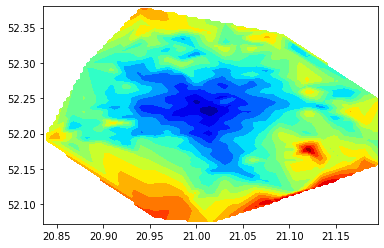

In [424]:
commute_geojson, df_commute=create_geojson(df_googlemaps.lon_mod,df_googlemaps.lat_mod,df_googlemaps.time_transit_8AM,5,5)

In [371]:

trace = go.Choroplethmapbox(
                            geojson=commute_geojson,
                            locations=df_commute.Id,
                            z=df_commute.value,
                            name="Morning commute time",
                            colorscale="jet",  
                            zauto=False,
                            zmax=60,
                            marker_line_width=0,

                            marker=dict(opacity=0.5),
                    
                           )
layout = go.Layout(
    title="Public transport commute time to center Monday 8AM [min]",  

   
    
    
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 80, b = 0, l = 0, r = 0),
    font = dict(color = 'dark grey', size = 18),
 
    mapbox = dict(
       

        center = dict(
            lat = center_coors[0],
            lon = center_coors[1]
        ),
        # default level of zoom
        zoom = 11,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=[trace]+undergroung_trace,
    layout=layout,

  
    )

iplot(figure)

## Looking for best balance between price and commute time

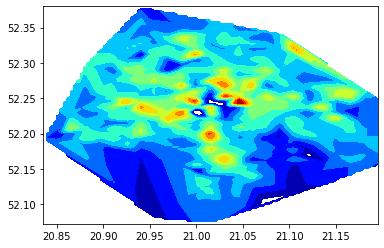

In [370]:
commute_price_geojson, df_commute_price=create_geojson(df_googlemaps.lon_mod,df_googlemaps.lat_mod,df_googlemaps.price_decrease_per_10min,500,1000)

In [388]:

trace = go.Choroplethmapbox(
                            geojson=commute_price_geojson,
                            locations=df_commute_price.Id,
                            z=df_commute_price.value,
                            name="Commute time vs price",
                            colorscale="jet",  
                           # zauto=False,
                           # zmax=60,
                            marker_line_width=0,

                            marker=dict(opacity=0.5),
                    
                           )
                           
layout = go.Layout(
    title="Price decrease from 20k/m2 per additional 10 min commute to center",  

   
    
    
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 80, b = 0, l = 0, r = 0),
    font = dict(color = 'dark grey', size = 18),
 
    mapbox = dict(
       

        center = dict(
            lat = center_coors[0],
            lon = center_coors[1]
        ),
        # default level of zoom
        zoom = 11,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=[trace]+undergroung_trace,
    layout=layout)

  
iplot(figure)


Let's see if we can find the best spots for balancing prices and commute time to center. I have chosen price drop per 10 min commute time as the KPI used to measure it. As maximum prices in the strict center oscilate around 20k we will see how much we can save from that, while also not making our commute too long. 

To avoid commute times below 10 mins driving this KPI values to be too high, the lowest denominator we use for calculation is 10 mins, even if the commute time is shorter. 

As an example, if we have an grid where average price is 12k per m2 and commute time to center takes 20 mins, that would mean that every 10 mins of commute time save us 4k in comparison to maximum price in strict center. 

It is easy to observe the relation between price drop per 10 mins of commute and underground stations, which is related to underground outperforming other transport times in terms of speed.

This is especially visible near the newly opened undergdound stations of Line C in Wola,Praga and Targowek, where price decrease per 10 min commute time can reach over 5k, which is related to short commute times (10-15 min) and prices, which are much lower than strict center. 

# Preparing data for models in Part 3

Combining property level data from Part 1 with googlemaps data from Part 2 will be fed to models in Part 3 to build a price estimator for benchmarking and finding best deals. 

In [363]:
df_googlemaps.drop(columns=["district"],inplace=True)
df_googlemaps.rename(columns={"unit_price":"grid_price"},inplace=True)

In [364]:
df_combined=pd.merge(df,df_googlemaps,on=["lat_mod","lon_mod"])

In [365]:
df_combined.shape

(11884, 66)

In [366]:
df_combined.columns

Index(['index', 'Unnamed: 0', 'Id', 'Area', 'Price', 'latitude', 'longitude',
       'build_year', 'building_floors_num', 'rooms_num', 'floors_num', 'City',
       'district', 'market', 'Building_material', 'Building_ownership',
       'Building_type', 'Construction_status', 'floor_no', 'Heating',
       'Windows_type', 'Equipment_types_dishwasher', 'Equipment_types_fridge',
       'Equipment_types_furniture', 'Equipment_types_oven',
       'Equipment_types_stove', 'Equipment_types_tv',
       'Equipment_types_washing_machine', 'Extras_types_air_conditioning',
       'Extras_types_attic', 'Extras_types_balcony', 'Extras_types_basement',
       'Extras_types_garage', 'Extras_types_garden', 'Extras_types_lift',
       'Extras_types_separate_kitchen', 'Extras_types_terrace',
       'Extras_types_two_storey', 'Extras_types_usable_room',
       'Media_types_cable-television', 'Media_types_electricity',
       'Media_types_internet', 'Media_types_phone', 'Media_types_sewage',
       'Media_t

In [367]:
drop_columns=['index', 'Unnamed: 0']

In [368]:
df_combined.drop(columns=drop_columns,inplace=True)

In [369]:
df_combined.to_excel("RE_models_input.xlsx",index=False)

In [370]:
df_combined.shape

(11884, 64)

In [371]:
df_combined.columns

Index(['Id', 'Area', 'Price', 'latitude', 'longitude', 'build_year',
       'building_floors_num', 'rooms_num', 'floors_num', 'City', 'district',
       'market', 'Building_material', 'Building_ownership', 'Building_type',
       'Construction_status', 'floor_no', 'Heating', 'Windows_type',
       'Equipment_types_dishwasher', 'Equipment_types_fridge',
       'Equipment_types_furniture', 'Equipment_types_oven',
       'Equipment_types_stove', 'Equipment_types_tv',
       'Equipment_types_washing_machine', 'Extras_types_air_conditioning',
       'Extras_types_attic', 'Extras_types_balcony', 'Extras_types_basement',
       'Extras_types_garage', 'Extras_types_garden', 'Extras_types_lift',
       'Extras_types_separate_kitchen', 'Extras_types_terrace',
       'Extras_types_two_storey', 'Extras_types_usable_room',
       'Media_types_cable-television', 'Media_types_electricity',
       'Media_types_internet', 'Media_types_phone', 'Media_types_sewage',
       'Media_types_water', 'Security_